### This creates a histogram for Guy to see which months fall into the no intrusion and peak intrusions

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.path as mpath
import xarray as xr
import cmocean.cm as cmocean
from collections import OrderedDict
import cftime
import glob,os
import matplotlib.colors as col
import xarray.ufuncs as xu
import gsw
import pandas as pd

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

# set to your figure directory location:
#figdir = '/g/data/v45/akm157/figures/Antarctic_tides_fixed/temp_transect_movie/'

## load some data that has the variable time. 

In [2]:
master_session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
cycle3 = '01deg_jra55v140_iaf_cycle3'

first_year = '1958'
last_year = '2018'

start_time=first_year+'-01-01'
end_time=last_year+'-12-31'

# set this to the rough region of interest:
lon_slice  = slice(-258, -248)
lat_slice  = slice(-67.5, -61)

In [3]:
# get temp and salt to calculate lines:
temp = cc.querying.getvar(cycle3,'temp',master_session,
                 start_time=start_time, end_time=end_time,frequency='1 monthly') - 273.15
temp = temp.sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)
temp = temp.load()

In [4]:
temp.time

<xarray.DataArray 'time' (time: 732)>
array(['1958-01-16T12:00:00.000000000', '1958-02-15T00:00:00.000000000',
       '1958-03-16T12:00:00.000000000', ..., '2018-10-16T12:00:00.000000000',
       '2018-11-16T00:00:00.000000000', '2018-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1958-01-16T12:00:00 ... 2018-12-16T12:00:00
Attributes:
    long_name:       time
    cartesian_axis:  T
    calendar_type:   GREGORIAN
    bounds:          time_bounds

### loading indexes previously calculated by "Selecting_peak_low_years" code stored in /Figures/New_codes_CFD

In [5]:
outpath = '/g/data/v45/ns3783/top_index.nc'
profile_data = xr.open_dataset(outpath)
top_id = profile_data.top_id

In [6]:
outpath = '/g/data/v45/ns3783/bottom_index.nc'
profile_data = xr.open_dataset(outpath)
bt_id = profile_data.bt_id

In [7]:
time_high = temp.time[top_id]
time_low = temp.time[bt_id]

In [8]:
# Create a DataFrame with the datetime strings
df = pd.DataFrame({'Date': time_high})

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract months
df['Month'] = df['Date'].dt.month

# Rename
mth_high = df

In [9]:
# Create a DataFrame with the datetime strings
df = pd.DataFrame({'Date': time_low})

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract months
df['Month'] = df['Date'].dt.month

# Rename
mth_low = df

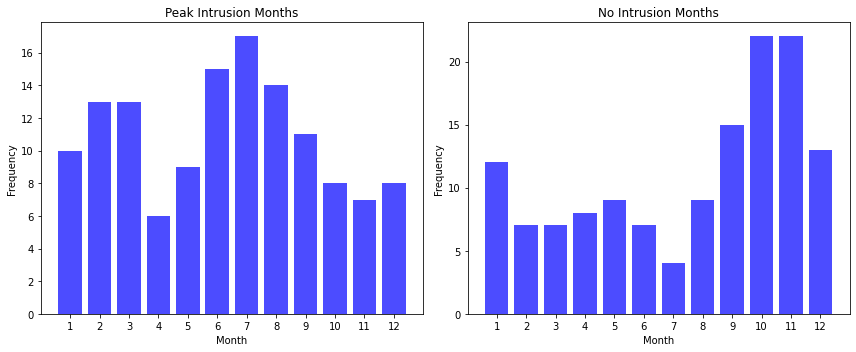

In [12]:
# Create a grid of subplots (1 row, 2 columns)
plt.figure(figsize=(12, 5))

# First Histogram
plt.subplot(1, 2, 1)
plt.hist(mth_high['Month'], bins=np.arange(1, 14), align='left', rwidth=0.8, alpha=0.7, color='blue')
plt.xticks(np.arange(1, 13))
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Peak Intrusion Months')


# Second Histogram
plt.subplot(1, 2, 2)
plt.hist(mth_low['Month'], bins=np.arange(1, 14), align='left', rwidth=0.8, alpha=0.7, color='blue')
plt.xticks(np.arange(1, 13))
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('No Intrusion Months')

# Adjust layout
plt.tight_layout()


figdir = '/g/data/v45/ns3783/ScriptsChapter3/Figures'
filestr = figdir+'/distribution_of_peak&no_intrusion_months.png'
plt.savefig(filestr,dpi=600,bbox_inches='tight')

# Show the combined plot
plt.show()